In [4]:
import numpy as np
from numpy import  genfromtxt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# 读入数据
data = genfromtxt(r"./Delivery.csv",delimiter=',')
print(data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [6]:
# 切分数据
x_data = data[:,:-1]#不包含最后一列
y_data = data[:,-1]#最后一列
print(x_data)
print(y_data)


[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]


In [10]:
# 学习率learning rate
lr = 0.001
# 参数
theta0 = 0
theta1 = 0
theta2 = 0
# 最大迭代次数
epochs = 100

# 最小二乘法
def compute_error(theta0,theta1,theta2,x_data,y_data):
    totalError = 0
    for  i in range(0,len(x_data)):
        totalError +=(y_data[i]-(theta1*x_data[i,0]+theta2*data[i,1]+theta0))**2
    return totalError/float(len(x_data))
def gradient_descent_runner(x_data,y_data,theta0,theta1,theta2,lr,epochs):
#     计算总数据量
    m = float(len(x_data))
#     循环次数
    for i in range(epochs):
        theta0_grad = 0
        theta1_grad = 0
        theta2_grad = 0
#         计算梯度的总和再求平均
        for j in range(0,len(x_data)):
            theta0_grad += -(1/m)*(y_data[j]-(theta1*x_data[j,0]+theta2*x_data[j,1]+theta0))
            theta1_grad +=-(1/m)*x_data[j,0]*(y_data[j]-(theta1*x_data[j,0]+theta2*x_data[j,1]+theta0))
            theta2_grad +=-(1/m)*x_data[j,1]*(y_data[j]-(theta1*x_data[j,0]+theta2*x_data[j,1]+theta0))
#         更新b和k
        theta0 = theta0 -(lr*theta0_grad)
        theta1 = theta1 -(lr*theta1_grad)
        theta2 = theta2 -(lr*theta2_grad)
    return theta0,theta1,theta2
print("Starting theta0={0},theta1={1},theta2={2},error={3}".format(theta0,theta1,theta2,compute_error(theta0,theta1,theta2,x_data,y_data)))
print("Running....")
theta0,theta1,theta2 = gradient_descent_runner(x_data,y_data,theta0,theta1,theta2,lr,epochs)
print("After{0} iterations theta0={1},theta1={2},theta2={3},error={4}".format(epochs,theta0,theta1,theta2,compute_error(theta0,theta1,theta2,x_data,y_data)))


Starting theta0=0,theta1=0,theta2=0,error=47.279999999999994
Running....
After100 iterations theta0=-9.773987471307434e+72,theta1=-8.240206291018857e+74,theta2=-2.8652498243019496e+73,error=4.59229346346351e+153


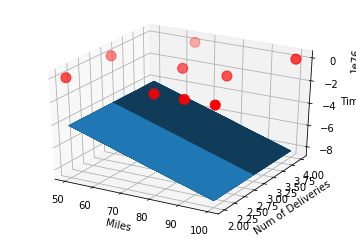

In [12]:
ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x_data[:,0],x_data[:,1],y_data,c='r',marker='o',s=100)#点为红色三角形
x0 =x_data[:,0]
x1 =x_data[:,1]
# 生成网格矩阵
x0,x1 = np.meshgrid(x0,x1)
z = theta0 +x0*theta1 + x1*theta2
# 画3D图
ax.plot_surface(x0,x1,z)
#设置坐标轴
ax.set_xlabel("Miles")
ax.set_ylabel("Num of Deliveries")
ax.set_zlabel("Time")

# 显示图像
plt.show()

In [29]:
x0,x1 = np.meshgrid([1,2,3],[4,5,6])
x0

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [30]:
x1

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [ ]:
(1,4) (2,4) (3,4)
(1,5) (2,5) (3,5)
(1,6) (2,6) (3,6)

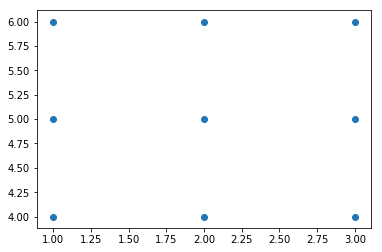

In [32]:
plt.scatter(x0,x1)
plt.show()

In [14]:
# 使用sklearn 创建模型
import numpy as np
from numpy import  genfromtxt
from sklearn import  linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# 读入数据
data = genfromtxt(r"./Delivery.csv",delimiter=',')
print(data)

[[100.    4.    9.3]
 [ 50.    3.    4.8]
 [100.    4.    8.9]
 [100.    2.    6.5]
 [ 50.    2.    4.2]
 [ 80.    2.    6.2]
 [ 75.    3.    7.4]
 [ 65.    4.    6. ]
 [ 90.    3.    7.6]
 [ 90.    2.    6.1]]


In [17]:
# 切分数据
x_data = data[:,:-1]
y_data = data[:,-1]
print(x_data)
print(y_data)

# 创建模型
model = linear_model.LinearRegression()
# 训练模型
model.fit(x_data,y_data)
# 系数
print("coefficients:",model.coef_)
# 截距
print("intercept:",model.intercept_)

# 测试
x_test = [[102,4]]
predict = model.predict(x_test)
print("predict:",predict)

[[100.   4.]
 [ 50.   3.]
 [100.   4.]
 [100.   2.]
 [ 50.   2.]
 [ 80.   2.]
 [ 75.   3.]
 [ 65.   4.]
 [ 90.   3.]
 [ 90.   2.]]
[9.3 4.8 8.9 6.5 4.2 6.2 7.4 6.  7.6 6.1]
coefficients: [0.0611346  0.92342537]
intercept: -0.8687014667817126
predict: [9.06072908]


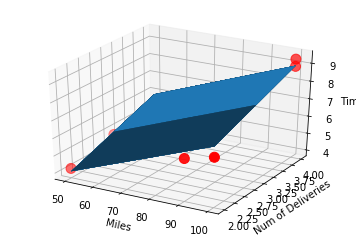

In [18]:
ax = plt.figure().add_subplot(111,projection='3d')
ax.scatter(x_data[:,0],x_data[:,1],y_data,c='r',marker='o',s=100)#点为红色三角形
x0=x_data[:,0]
x1=x_data[:,1]
# 生成网格矩阵
x0,x1=np.meshgrid(x0,x1)
z = model.intercept_ + x0*model.coef_[0]+x1*model.coef_[1]
# 画3D
ax.plot_surface(x0,x1,z)
# 设置坐标轴
ax.set_xlabel("Miles")
ax.set_ylabel("Num of Deliveries")
ax.set_zlabel("Time")

plt.show()